In [ ]:
from google.colab import drive
drive.mount('/content/drive')
%cd /content/drive/My Drive/ConceptOfAI

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
/content/drive/My Drive/ConceptOfAI


Dataset loaded successfully.
First 10 rows of the dataset:
  Country name  score  Log GDP per capita  Social support  \
0      Finland  7.741               1.844           1.572   
1      Denmark  7.583               1.908           1.520   
2      Iceland  7.525               1.881           1.617   
3       Sweden  7.344               1.878           1.501   
4       Israel  7.341               1.803           1.513   
5  Netherlands  7.319               1.901           1.462   
6       Norway  7.302               1.952           1.517   
7   Luxembourg  7.122               2.141           1.355   
8  Switzerland  7.060               1.970           1.425   
9    Australia  7.057               1.854           1.461   

   Healthy life expectancy  Freedom to make life choices  Generosity  \
0                    0.695                         0.859       0.142   
1                    0.699                         0.823       0.204   
2                    0.718                         0.

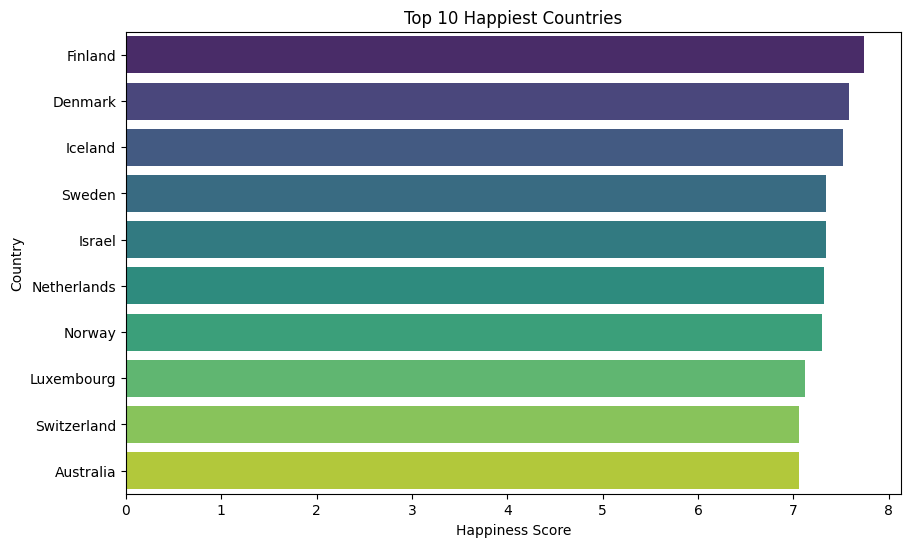

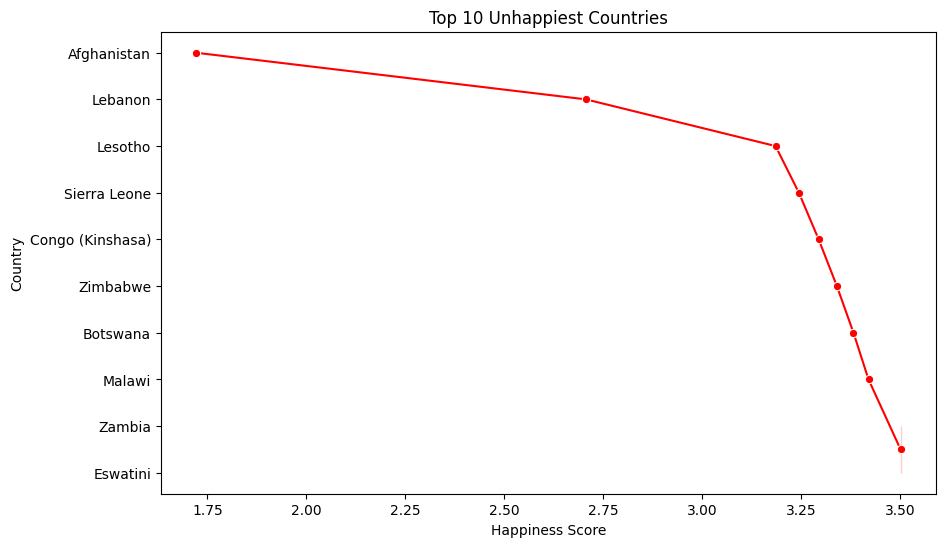

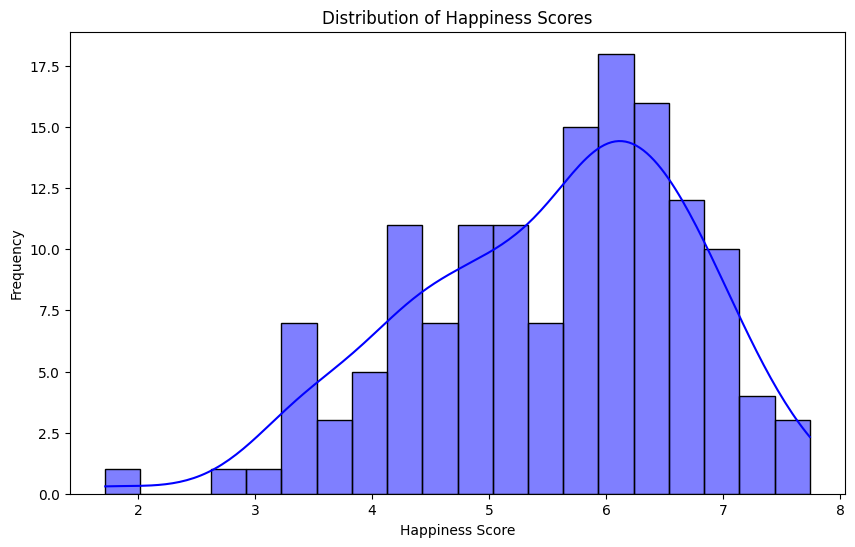

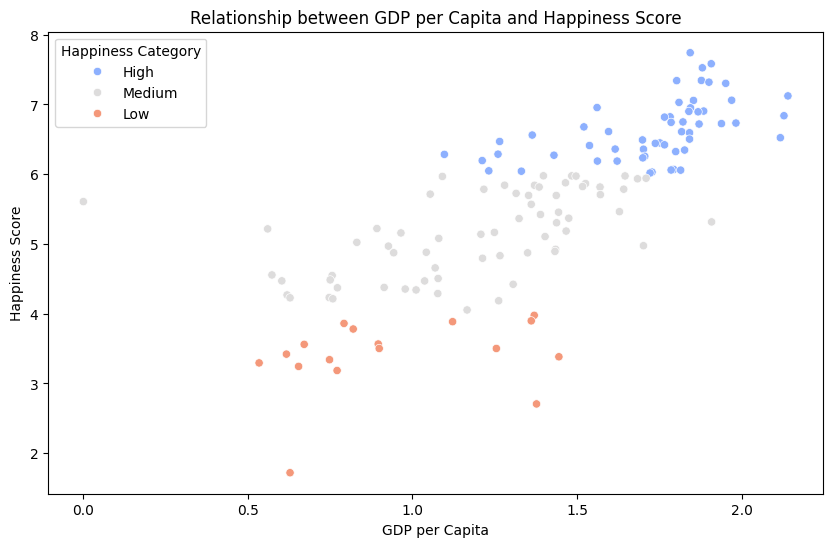

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
data_path = "WHR-2024-5CS037.csv"  # Accessing the data path
try:
    happiness_data = pd.read_csv(data_path)
    print("Dataset loaded successfully.")
except FileNotFoundError:
    print("Dataset not found. Please make sure the file is in the specified location.")
    happiness_data = None

if happiness_data is not None:

    # Problem 1: Data Exploration and Visualization
    print("First 10 rows of the dataset:")
    print(happiness_data.head(10))

    print("\nDataset Overview:")
    print(f"Number of rows: {happiness_data.shape[0]}")
    print(f"Number of columns: {happiness_data.shape[1]}")
    print("Column names and data types:")
    print(happiness_data.dtypes)

    if 'score' in happiness_data.columns:
        print("\nBasic Statistics for 'score' column:")
        print(f"Mean: {happiness_data['score'].mean():.2f}")
        print(f"Median: {happiness_data['score'].median():.2f}")
        print(f"Standard Deviation: {happiness_data['score'].std():.2f}")
        max_score_country = happiness_data.loc[happiness_data['score'].idxmax(), 'Country name']
        min_score_country = happiness_data.loc[happiness_data['score'].idxmin(), 'Country name']
        print(f"Country with the highest score: {max_score_country}")
        print(f"Country with the lowest score: {min_score_country}")

    print("\nMissing Values Check:")
    print(happiness_data.isnull().sum())

    high_score_countries = happiness_data[happiness_data['score'] > 7.5]
    print("\nCountries with Score > 7.5:")
    print(high_score_countries[['Country name', 'score']])

    if 'Log GDP per capita' in happiness_data.columns:
        sorted_countries = high_score_countries.sort_values(by='Log GDP per capita', ascending=False)
        print("\nTop 10 countries with highest GDP per Capita:")
        print(sorted_countries[['Country name', 'Log GDP per capita']].head(10))

    def categorize_happiness(score):
        if score < 4:
            return 'Low'
        elif 4 <= score <= 6:
            return 'Medium'
        else:
            return 'High'

    happiness_data['Happiness Category'] = happiness_data['score'].apply(categorize_happiness)
    print("\nHappiness categories added:")
    print(happiness_data[['Country name', 'score', 'Happiness Category']].head(10))

    top_10_happiest = happiness_data.nlargest(10, 'score')
    plt.figure(figsize=(10, 6))
    sns.barplot(x='score', y='Country name', data=top_10_happiest, hue='Country name', palette='viridis', dodge=False, legend=False)
    plt.title('Top 10 Happiest Countries')
    plt.xlabel('Happiness Score')
    plt.ylabel('Country')
    plt.show()

    top_10_unhappiest = happiness_data.nsmallest(10, 'score')
    plt.figure(figsize=(10, 6))
    sns.lineplot(x='score', y='Country name', marker='o', data=top_10_unhappiest, color='red')
    plt.title('Top 10 Unhappiest Countries')
    plt.xlabel('Happiness Score')
    plt.ylabel('Country')
    plt.show()

    plt.figure(figsize=(10, 6))
    sns.histplot(happiness_data['score'], kde=True, bins=20, color='blue')
    plt.title('Distribution of Happiness Scores')
    plt.xlabel('Happiness Score')
    plt.ylabel('Frequency')
    plt.show()

    plt.figure(figsize=(10, 6))
    sns.scatterplot(x='Log GDP per capita', y='score', data=happiness_data, hue='Happiness Category', palette='coolwarm')
    plt.title('Relationship between GDP per Capita and Happiness Score')
    plt.xlabel('GDP per Capita')
    plt.ylabel('Happiness Score')
    plt.legend(title='Happiness Category')
    plt.show()

Dataset loaded successfully.
South Asia dataset saved as 'South_Asia_Happiness.csv'.


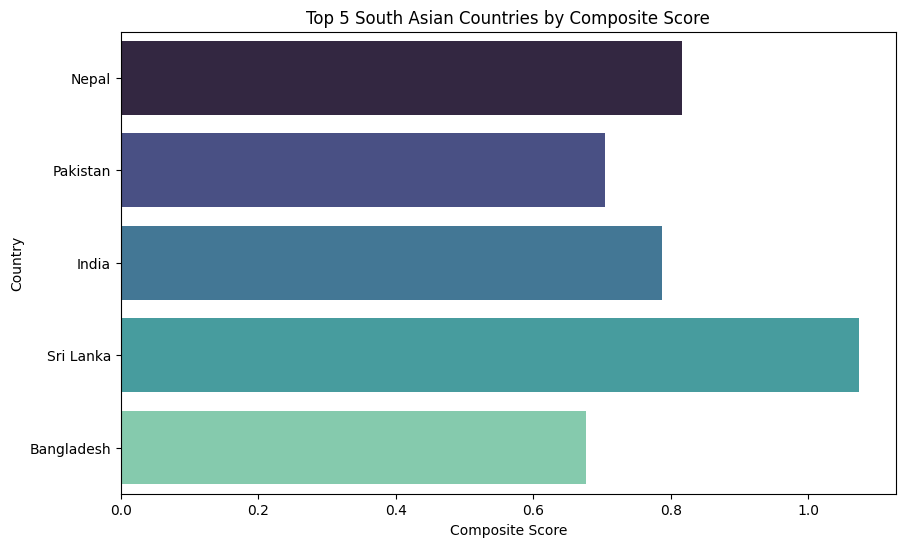

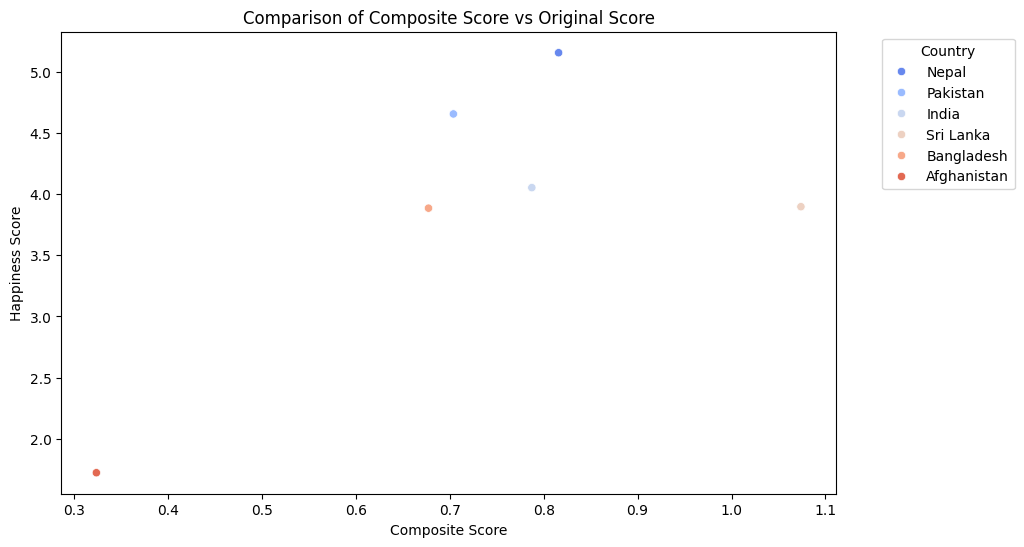


Outliers in South Asia:
    Country name  score  Log GDP per capita
142  Afghanistan  1.721               0.628


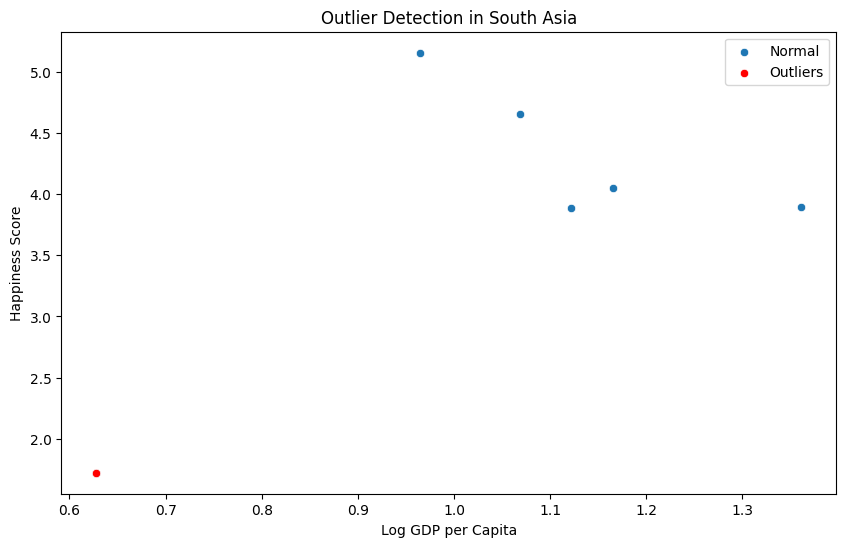


Pearson correlation between Freedom to make life choices and Happiness Score: 0.80


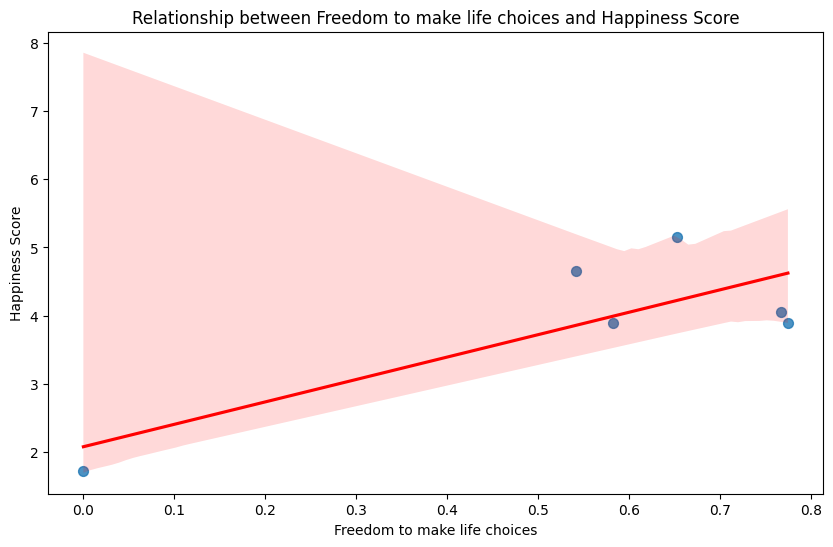


Pearson correlation between Generosity and Happiness Score: 0.87


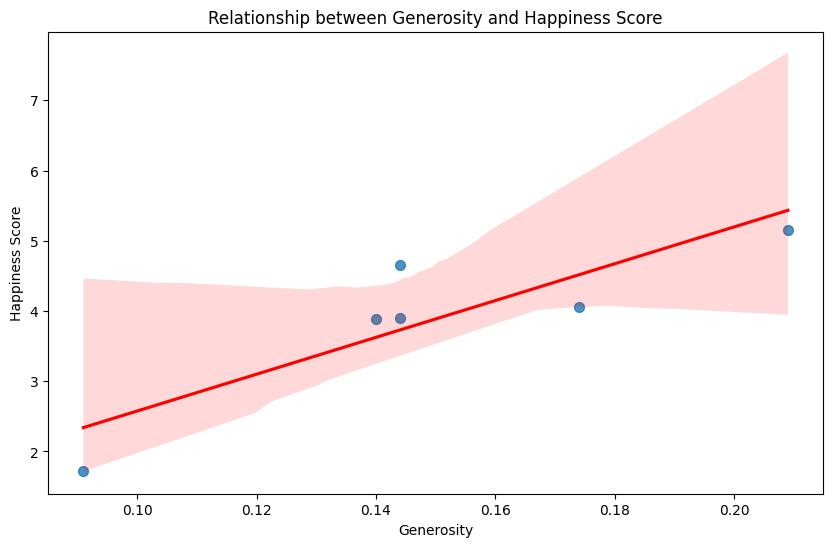


Top 3 countries with largest positive GDP-Score Gap:
    Country name  GDP-Score Gap
142  Afghanistan         -1.093
127    Sri Lanka         -2.537
128   Bangladesh         -2.764

Top 3 countries with largest negative GDP-Score Gap:
    Country name  GDP-Score Gap
92         Nepal         -4.193
107     Pakistan         -3.588
125        India         -2.888


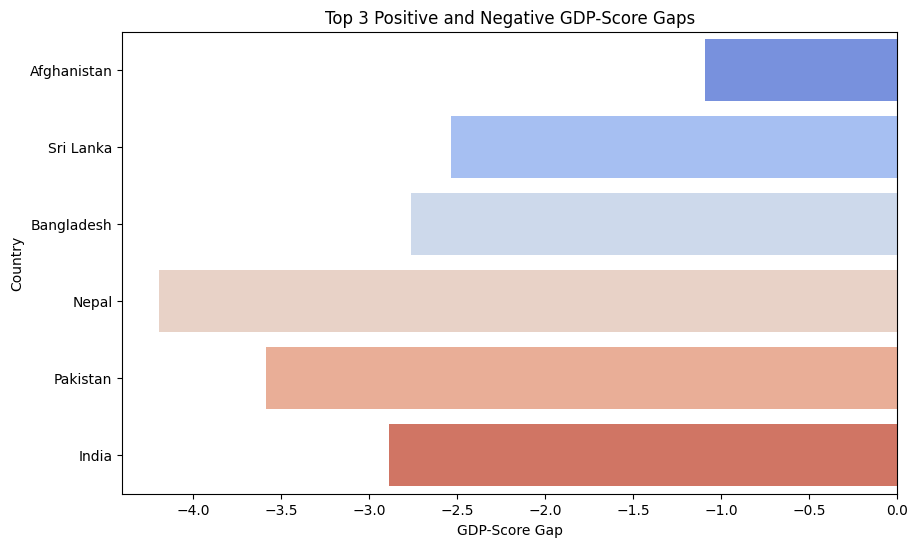


Analysis Complete.


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
data_path = "WHR-2024-5CS037.csv"
try:
    happiness_data = pd.read_csv(data_path)
    print("Dataset loaded successfully.")
except FileNotFoundError:
    print("Dataset not found. Please make sure the file is in the specified location.")
    happiness_data = None

if happiness_data is not None:
    # Define South Asian countries
    south_asian_countries = ["Afghanistan", "Bangladesh", "Bhutan", "India", "Maldives", "Nepal", "Pakistan", "Sri Lanka"]

    # Filter dataset for South Asian countries
    south_asia_data = happiness_data[happiness_data['Country name'].isin(south_asian_countries)].copy()

    # Save filtered data to a CSV file
    south_asia_data.to_csv('South_Asia_Happiness.csv', index=False)
    print("South Asia dataset saved as 'South_Asia_Happiness.csv'.")

    # Task 2: Composite Score Ranking (Only once)
    south_asia_data.loc[:, 'Composite Score'] = (0.4 * south_asia_data['Log GDP per capita'] +
                                                 0.3 * south_asia_data['Social support'] +
                                                 0.3 * south_asia_data['Healthy life expectancy'])

    # Visualization of Top 5 Countries by Composite Score
    plt.figure(figsize=(10, 6))
    sns.barplot(x='Composite Score', y='Country name', data=south_asia_data.head(5), hue='Country name', palette='mako')
    plt.title('Top 5 South Asian Countries by Composite Score')
    plt.xlabel('Composite Score')
    plt.ylabel('Country')
    plt.show()

    # Comparison with original Score
    plt.figure(figsize=(10, 6))
    sns.scatterplot(x='Composite Score', y='score', data=south_asia_data, hue='Country name', palette='coolwarm')
    plt.title('Comparison of Composite Score vs Original Score')
    plt.xlabel('Composite Score')
    plt.ylabel('Happiness Score')
    plt.legend(title='Country', bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.show()

    # Task 3: Outlier Detection
    Q1 = south_asia_data[['score', 'Log GDP per capita']].quantile(0.25)
    Q3 = south_asia_data[['score', 'Log GDP per capita']].quantile(0.75)
    IQR = Q3 - Q1

    outliers = south_asia_data[((south_asia_data['score'] < (Q1['score'] - 1.5 * IQR['score'])) |
                                (south_asia_data['score'] > (Q3['score'] + 1.5 * IQR['score']))) |
                               ((south_asia_data['Log GDP per capita'] < (Q1['Log GDP per capita'] - 1.5 * IQR['Log GDP per capita'])) |
                                (south_asia_data['Log GDP per capita'] > (Q3['Log GDP per capita'] + 1.5 * IQR['Log GDP per capita'])))]

    print("\nOutliers in South Asia:")
    print(outliers[['Country name', 'score', 'Log GDP per capita']])

    # Scatter plot highlighting outliers
    plt.figure(figsize=(10, 6))
    sns.scatterplot(x='Log GDP per capita', y='score', data=south_asia_data, label='Normal')
    sns.scatterplot(x='Log GDP per capita', y='score', data=outliers, color='red', label='Outliers')
    plt.title('Outlier Detection in South Asia')
    plt.xlabel('Log GDP per Capita')
    plt.ylabel('Happiness Score')
    plt.legend()
    plt.show()

    # Task 4: Exploring Trends Across Metrics
    metrics = ['Freedom to make life choices', 'Generosity']
    for metric in metrics:
        correlation = south_asia_data[metric].corr(south_asia_data['score'])
        print(f"\nPearson correlation between {metric} and Happiness Score: {correlation:.2f}")

        plt.figure(figsize=(10, 6))
        sns.regplot(x=metric, y='score', data=south_asia_data, scatter_kws={'s': 50}, line_kws={'color': 'red'})
        plt.title(f'Relationship between {metric} and Happiness Score')
        plt.xlabel(metric)
        plt.ylabel('Happiness Score')
        plt.show()

    # Task 5: Gap Analysis
    south_asia_data['GDP-Score Gap'] = south_asia_data['Log GDP per capita'] - south_asia_data['score']

    print("\nTop 3 countries with largest positive GDP-Score Gap:")
    print(south_asia_data.nlargest(3, 'GDP-Score Gap')[['Country name', 'GDP-Score Gap']])

    print("\nTop 3 countries with largest negative GDP-Score Gap:")
    print(south_asia_data.nsmallest(3, 'GDP-Score Gap')[['Country name', 'GDP-Score Gap']])

    # Visualize GDP-Score Gap
    plt.figure(figsize=(10, 6))
    top_gap_countries = pd.concat([south_asia_data.nlargest(3, 'GDP-Score Gap'),
                                    south_asia_data.nsmallest(3, 'GDP-Score Gap')])
    sns.barplot(x='GDP-Score Gap', y='Country name', data=top_gap_countries, hue='Country name', palette='coolwarm')
    plt.title('Top 3 Positive and Negative GDP-Score Gaps')
    plt.xlabel('GDP-Score Gap')
    plt.ylabel('Country')
    plt.show()

    print("\nAnalysis Complete.")


Dataset loaded successfully.

South Asia - Mean and Std of Scores:
mean    3.895667
std     1.177069
Name: score, dtype: float64

Middle East - Mean and Std of Scores:
mean    5.412100
std     1.566201
Name: score, dtype: float64

Middle East has higher happiness scores on average.

Top 3 South Asian Countries:
    Country name  score
92         Nepal  5.158
107     Pakistan  4.657
125        India  4.054

Bottom 3 South Asian Countries:
    Country name  score
142  Afghanistan  1.721
128   Bangladesh  3.886
127    Sri Lanka  3.898

Top 3 Middle Eastern Countries:
            Country name  score
4                 Israel  7.341
12                Kuwait  6.951
21  United Arab Emirates  6.733

Bottom 3 Middle Eastern Countries:
    Country name  score
141      Lebanon  2.707
132        Yemen  3.561
124       Jordan  4.186


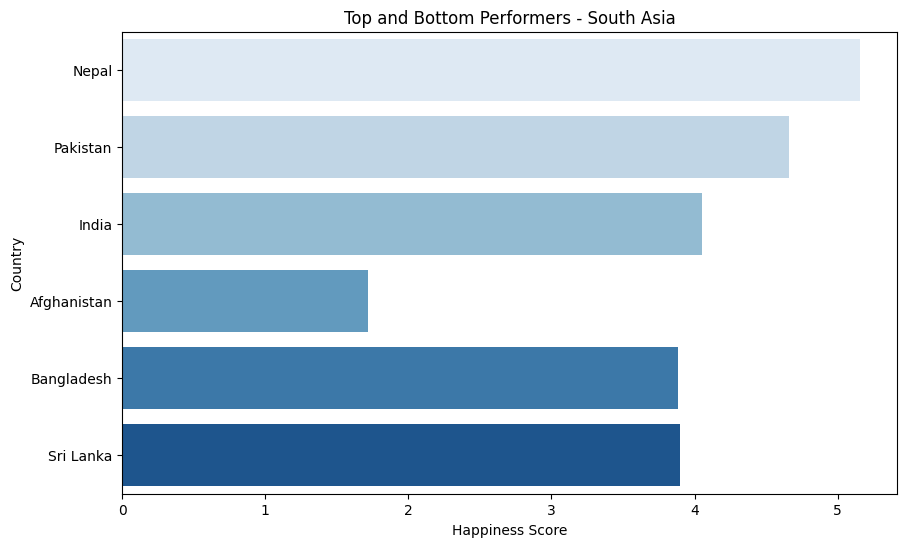

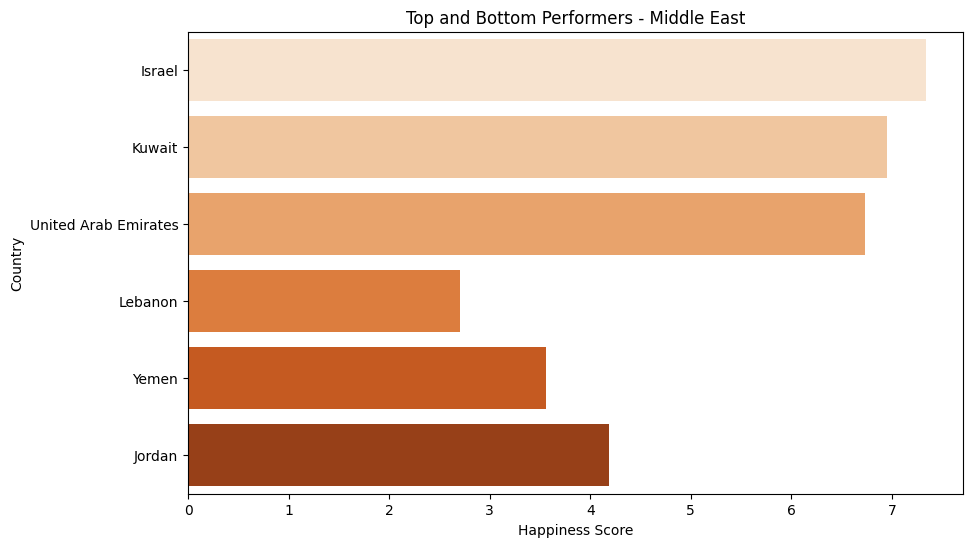


Mean values of key metrics by region:
             Log GDP per capita  Social support  Healthy life expectancy
Region                                                                  
Middle East            1.496333        1.152778                 0.554111
South Asia             1.051833        0.611833                 0.420333


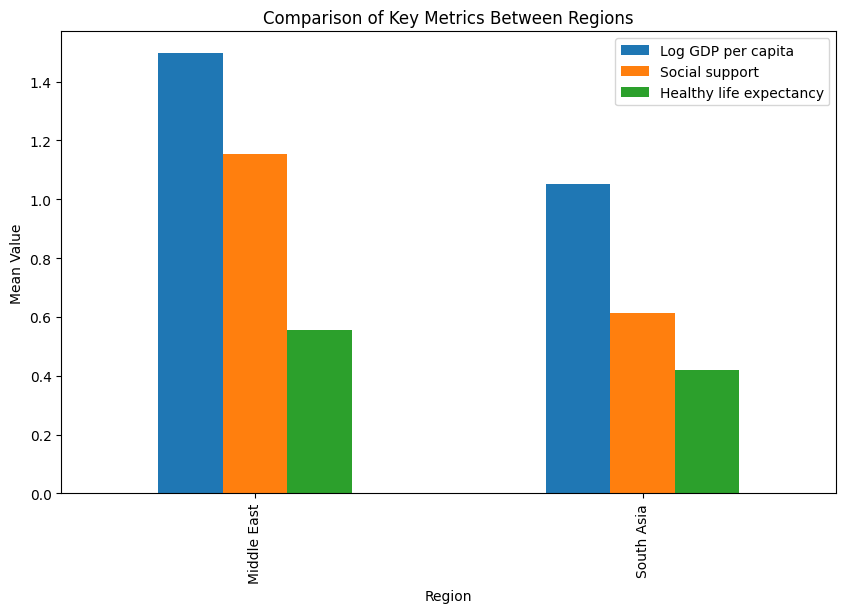


Metric with largest disparity between regions: Social support

Happiness Disparity:
South Asia - Range: 3.44, CV: 0.30
Middle East - Range: 4.63, CV: 0.29

South Asia has greater variability in happiness.

Correlations for South Asia:
Correlation between Score and Freedom to make life choices: 0.80


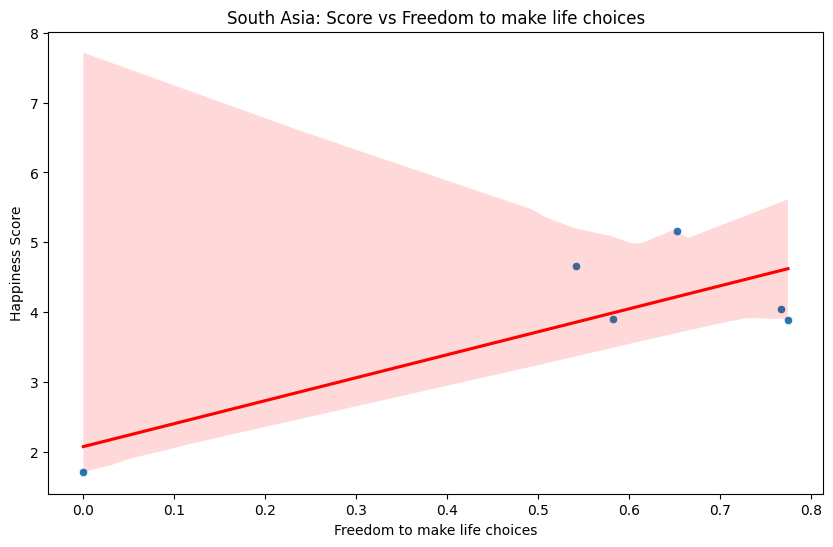

Correlation between Score and Generosity: 0.87


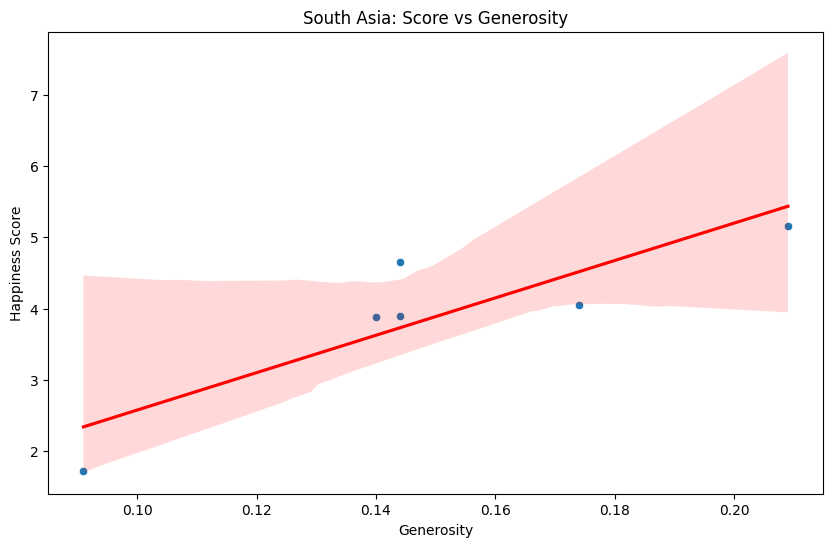


Correlations for Middle East:
Correlation between Score and Freedom to make life choices: 0.86


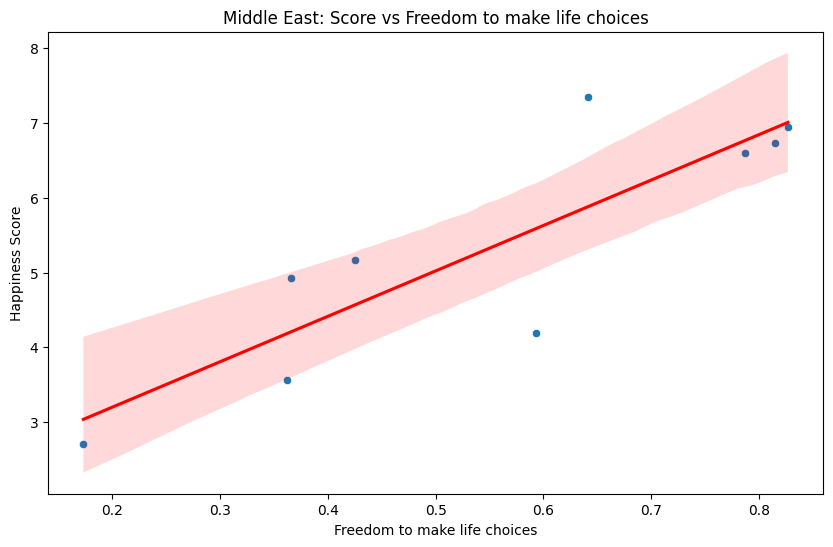

Correlation between Score and Generosity: 0.63


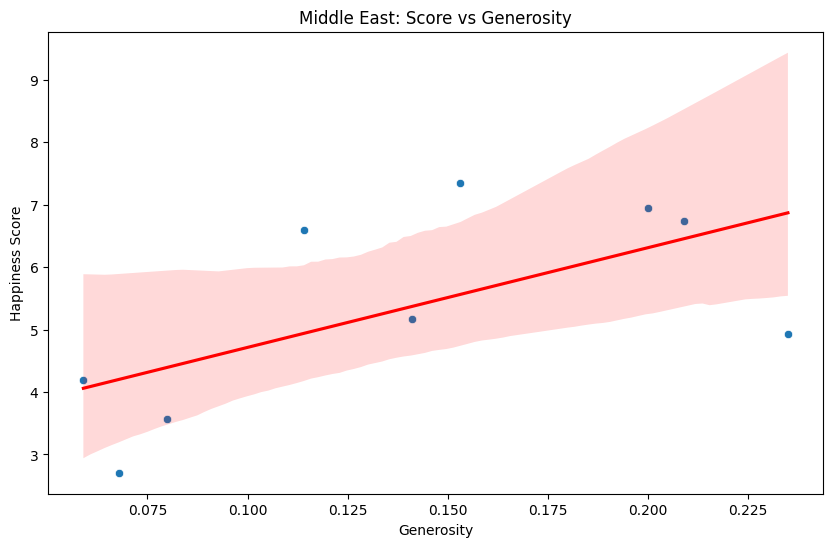


Outlier Detection for South Asia:
Outliers based on score:
    Country name  score
142  Afghanistan  1.721


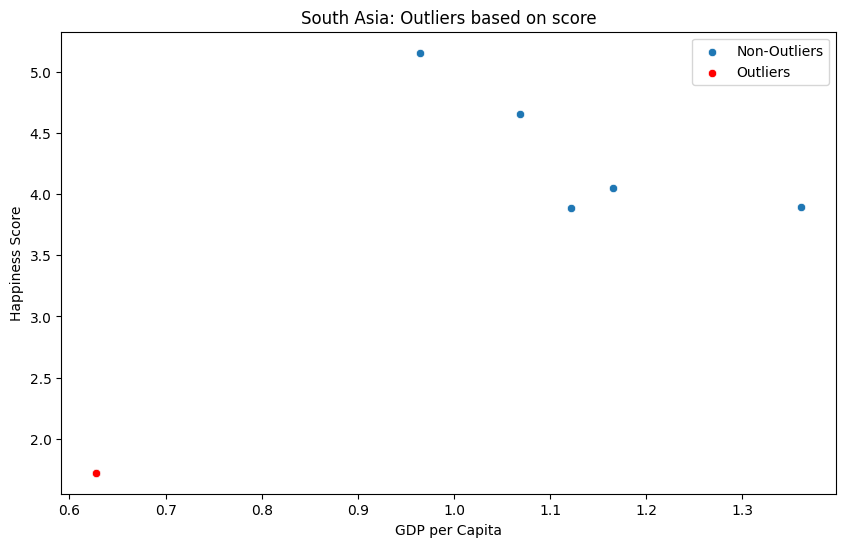

Outliers based on Log GDP per capita:
    Country name  Log GDP per capita
142  Afghanistan               0.628


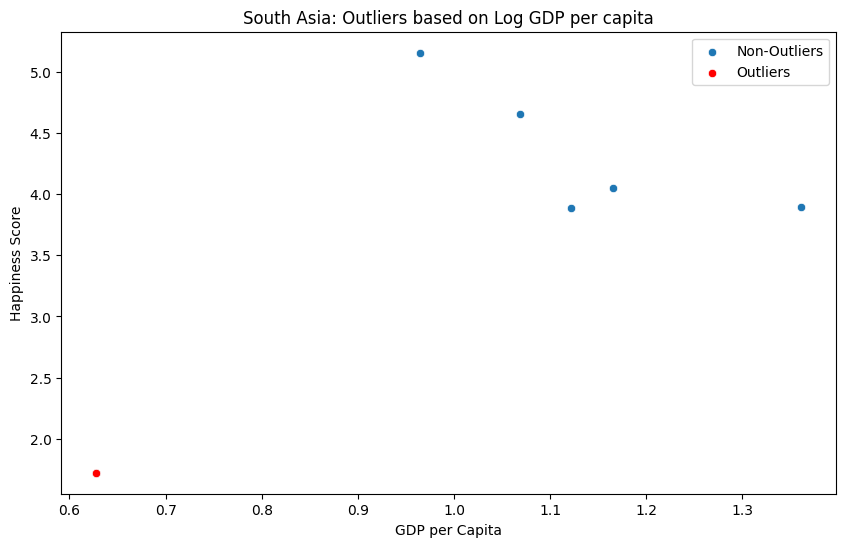


Outlier Detection for Middle East:
Outliers based on score:
Empty DataFrame
Columns: [Country name, score]
Index: []


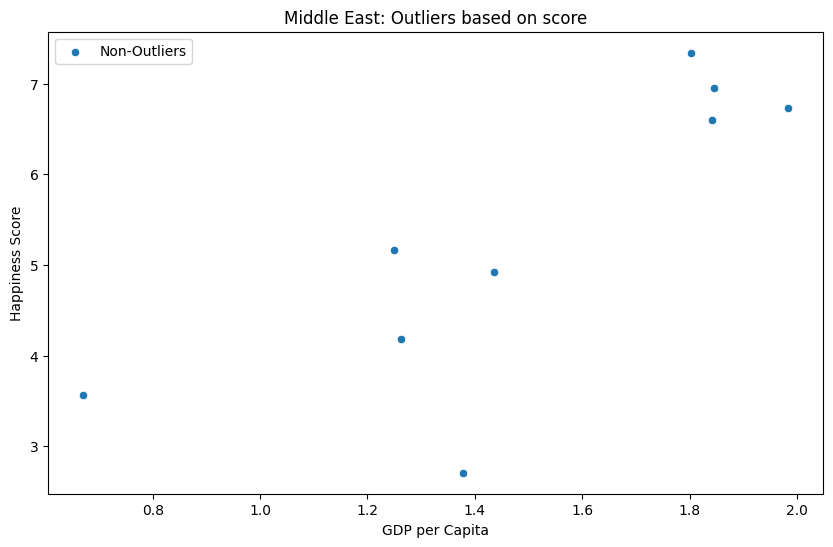

Outliers based on Log GDP per capita:
Empty DataFrame
Columns: [Country name, Log GDP per capita]
Index: []


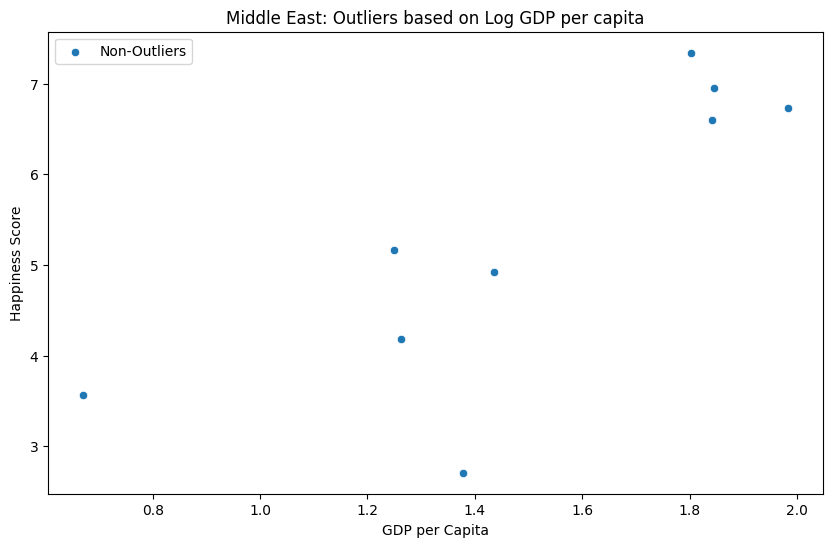

<ipython-input-14-661369084348>:143: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Region', y='score', data=region_data, palette='Set2')


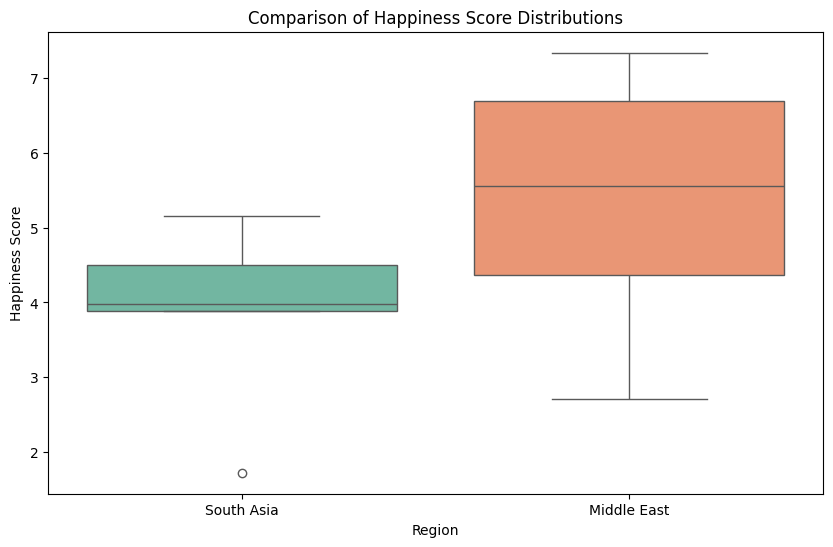

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

data_path = "WHR-2024-5CS037.csv"  # Accessing the data path
try:
    happiness_data = pd.read_csv(data_path)
    print("Dataset loaded successfully.")
except FileNotFoundError:
    print("Dataset not found. Please make sure the file is in the specified location.")
    happiness_data = None

if happiness_data is not None:

    # Problem 3: Comparative Analysis
    south_asian_countries = ["Afghanistan", "Bangladesh", "Bhutan", "India", "Maldives", "Nepal", "Pakistan", "Sri Lanka"]
    middle_east_countries = ["Bahrain", "Iran", "Iraq", "Israel", "Jordan", "Kuwait", "Lebanon", "Oman", "Palestine", "Qatar", "Saudi Arabia", "Syria", "United Arab Emirates", "Yemen"]

    south_asia_data = happiness_data[happiness_data['Country name'].isin(south_asian_countries)]
    middle_east_data = happiness_data[happiness_data['Country name'].isin(middle_east_countries)]

    # Task 1: Descriptive Statistics
    south_asia_stats = south_asia_data['score'].agg(['mean', 'std'])
    middle_east_stats = middle_east_data['score'].agg(['mean', 'std'])

    print("\nSouth Asia - Mean and Std of Scores:")
    print(south_asia_stats)
    print("\nMiddle East - Mean and Std of Scores:")
    print(middle_east_stats)

    higher_average_region = "South Asia" if south_asia_stats['mean'] > middle_east_stats['mean'] else "Middle East"
    print(f"\n{higher_average_region} has higher happiness scores on average.")

    # Task 2: Top and Bottom Performers
    top_3_south_asia = south_asia_data.nlargest(3, 'score')[['Country name', 'score']]
    bottom_3_south_asia = south_asia_data.nsmallest(3, 'score')[['Country name', 'score']]

    top_3_middle_east = middle_east_data.nlargest(3, 'score')[['Country name', 'score']]
    bottom_3_middle_east = middle_east_data.nsmallest(3, 'score')[['Country name', 'score']]

    print("\nTop 3 South Asian Countries:")
    print(top_3_south_asia)
    print("\nBottom 3 South Asian Countries:")
    print(bottom_3_south_asia)

    print("\nTop 3 Middle Eastern Countries:")
    print(top_3_middle_east)
    print("\nBottom 3 Middle Eastern Countries:")
    print(bottom_3_middle_east)

    plt.figure(figsize=(10, 6))
    sns.barplot(x='score', y='Country name', data=pd.concat([top_3_south_asia, bottom_3_south_asia]), hue='Country name', dodge=False, palette='Blues')
    plt.title('Top and Bottom Performers - South Asia')
    plt.xlabel('Happiness Score')
    plt.ylabel('Country')
    plt.show()

    plt.figure(figsize=(10, 6))
    sns.barplot(x='score', y='Country name', data=pd.concat([top_3_middle_east, bottom_3_middle_east]), hue='Country name', dodge=False, palette='Oranges')
    plt.title('Top and Bottom Performers - Middle East')
    plt.xlabel('Happiness Score')
    plt.ylabel('Country')
    plt.show()


    # Task 3: Metric Comparisons
    metrics = ['Log GDP per capita', 'Social support', 'Healthy life expectancy']
    region_data = pd.concat([
    south_asia_data[metrics + ['Country name', 'score']].assign(Region='South Asia'),
    middle_east_data[metrics + ['Country name', 'score']].assign(Region='Middle East')
    ])



    region_means = region_data.groupby('Region')[metrics].mean()
    print("\nMean values of key metrics by region:")
    print(region_means)

    region_means.plot(kind='bar', figsize=(10, 6))
    plt.title('Comparison of Key Metrics Between Regions')
    plt.ylabel('Mean Value')
    plt.show()

    largest_disparity_metric = (region_means.max() - region_means.min()).idxmax()
    print(f"\nMetric with largest disparity between regions: {largest_disparity_metric}")

    # Task 4: Happiness Disparity
    south_asia_range = south_asia_data['score'].max() - south_asia_data['score'].min()
    middle_east_range = middle_east_data['score'].max() - middle_east_data['score'].min()

    south_asia_cv = south_asia_data['score'].std() / south_asia_data['score'].mean()
    middle_east_cv = middle_east_data['score'].std() / middle_east_data['score'].mean()

    print("\nHappiness Disparity:")
    print(f"South Asia - Range: {south_asia_range:.2f}, CV: {south_asia_cv:.2f}")
    print(f"Middle East - Range: {middle_east_range:.2f}, CV: {middle_east_cv:.2f}")

    greater_variability_region = "South Asia" if south_asia_cv > middle_east_cv else "Middle East"
    print(f"\n{greater_variability_region} has greater variability in happiness.")

    # Task 5: Correlation Analysis
    correlation_metrics = ['Freedom to make life choices', 'Generosity']
    for region, data in [('South Asia', south_asia_data), ('Middle East', middle_east_data)]:
        print(f"\nCorrelations for {region}:")
        for metric in correlation_metrics:
            if metric in data.columns:
                correlation = data['score'].corr(data[metric])
                print(f"Correlation between Score and {metric}: {correlation:.2f}")

                plt.figure(figsize=(10, 6))
                sns.scatterplot(x=metric, y='score', data=data)
                sns.regplot(x=metric, y='score', data=data, scatter=False, color='red')
                plt.title(f'{region}: Score vs {metric}')
                plt.xlabel(metric)
                plt.ylabel('Happiness Score')
                plt.show()

    # Task 6: Outlier Detection
    for region, data in [('South Asia', south_asia_data), ('Middle East', middle_east_data)]:
        print(f"\nOutlier Detection for {region}:")
        for metric in ['score', 'Log GDP per capita']:
            Q1 = data[metric].quantile(0.25)
            Q3 = data[metric].quantile(0.75)
            IQR = Q3 - Q1
            outliers = data[(data[metric] < Q1 - 1.5 * IQR) | (data[metric] > Q3 + 1.5 * IQR)]
            print(f"Outliers based on {metric}:")
            print(outliers[['Country name', metric]])

            plt.figure(figsize=(10, 6))
            sns.scatterplot(x='Log GDP per capita', y='score', data=data, label='Non-Outliers')
            if not outliers.empty:
                sns.scatterplot(x='Log GDP per capita', y='score', data=outliers, color='red', label='Outliers')
            plt.title(f'{region}: Outliers based on {metric}')
            plt.xlabel('GDP per Capita')
            plt.ylabel('Happiness Score')
            plt.legend()
            plt.show()

    # Task 7: Visualization

plt.figure(figsize=(10, 6))
sns.boxplot(x='Region', y='score', data=region_data, palette='Set2')
plt.title('Comparison of Happiness Score Distributions')
plt.xlabel('Region')
plt.ylabel('Happiness Score')
plt.show()
